In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

# Load the data

In [2]:
data = pd.read_csv("dataset/1.01. Simple linear regression.csv")

# Explore the data

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# Declare the independent variable(Feature/input) and dependent variable(target/output)

In [5]:
x = data["SAT"]
y = data["GPA"]

In [6]:
#This is a 1 Dimensional object
x.shape

(84,)

In [7]:
y.shape

(84,)

# Regression itself

In [8]:
#Change the x to a 2 Dimensional object for Simple linear regression
x_matrix = x.values.reshape(-1,1)

In [9]:
x_matrix.shape

(84, 1)

In [10]:
reg = LinearRegression()

# fit the Regression

In [11]:
reg.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# R-squared

In [12]:
R_squared = reg.score(x_matrix,y)
R_squared

0.40600391479679765

# Coefficient

In [13]:
coefficient = reg.coef_
coefficient

array([0.00165569])

# Intercept

In [14]:
intercept = reg.intercept_
intercept

0.27504029966028076

In [15]:
measurements = pd.DataFrame({"R_squared":R_squared,"Coefficient":coefficient,"Intercept":intercept})
measurements

,R_squared,Coefficient,Intercept
0,0.406004,0.001656,0.27504


# Making Predictions

In [16]:
new_data = pd.DataFrame({"SAT":[1740,1950]})
new_data

,SAT
0,1740
1,1950


In [17]:
prediction = reg.predict(new_data)
prediction

array([3.15593751, 3.503632  ])

In [18]:
predictiondf = pd.DataFrame({"Predictions":prediction})
predictiondf

,Predictions
0,3.155938
1,3.503632


In [19]:
new_data.join(predictiondf)

,SAT,Predictions
0,1740,3.155938
1,1950,3.503632


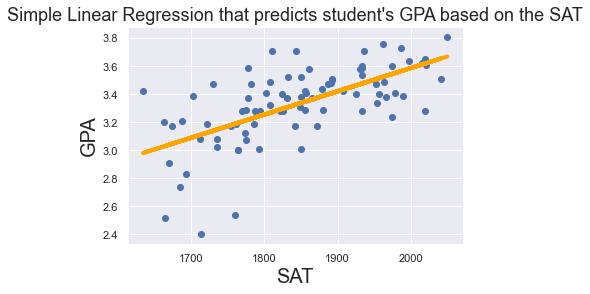

In [20]:
plt.scatter(x,y)
#yhat = 0.275 + 0.0017*x_matrix
yhat = intercept + coefficient*x_matrix
fig = plt.plot(x,yhat,lw=4,c="orange",label="regression line")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.title("Simple Linear Regression that predicts student's GPA based on the SAT",fontsize=18)
plt.show()